# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [81]:
cnn = tf.keras.models.load_model('trained_plant_disease_model')

#Visualising and Performing Prediction on Single image

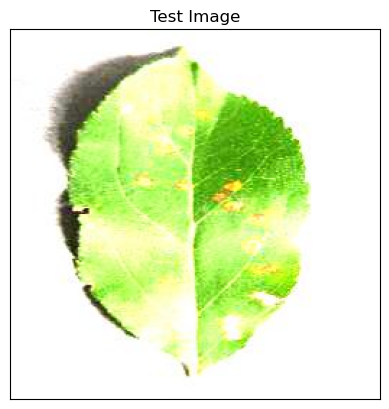

In [83]:
#Test Image Visualization
import cv2
image_path = 'Plant_Disease_Dataset/test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [86]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 410ms/step


In [88]:
print(predictions)

[[1.8755510e-07 2.5189053e-07 9.9991488e-01 6.6685710e-09 7.3831536e-05
  6.2619501e-09 2.4976765e-10 1.2701345e-08 5.2386485e-12 6.7700108e-12
  1.1873774e-13 8.0865357e-07 5.4259374e-07 1.8004645e-10 4.9487397e-08
  2.2130154e-08 2.4980829e-09 1.4961769e-07 1.8360325e-07 4.5426509e-07
  3.5666319e-09 4.2186338e-11 1.9433811e-08 7.4233117e-09 5.2148516e-12
  7.9804913e-12 3.8997622e-10 7.0315997e-10 1.0158222e-07 1.3186597e-06
  2.1647760e-07 7.0347017e-09 3.4594787e-08 2.6101538e-10 6.6798916e-06
  4.8115547e-09 1.0059178e-07 3.3486685e-09]]


In [90]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


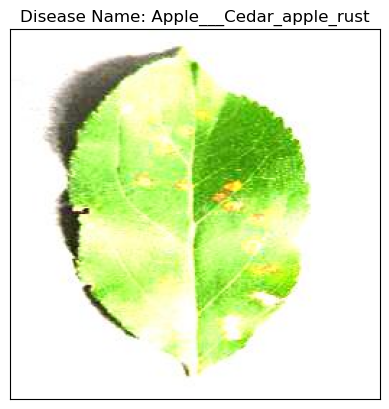

In [93]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

# onspot

In [95]:
image_path1="Plant_Disease_Dataset/test/test/Po"
img1 = cv2.imread(image_path1)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [67]:
image = tf.keras.preprocessing.image.load_img(image_path1,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 50ms/step


In [69]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


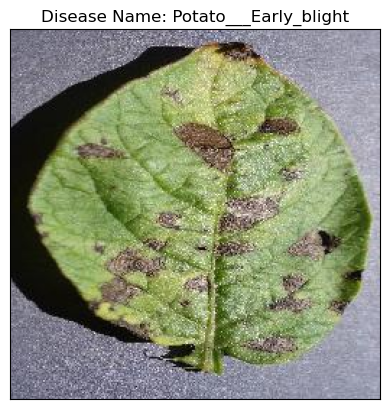

In [71]:
model_prediction = class_name[result_index]
plt.imshow(img1)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()